# Análise de Dados de Poluição e Sintomas em Osasco

Este notebook integra dados de poluição atmosférica e sintomas reportados na cidade de Osasco, com o objetivo de investigar possíveis correlações entre eles. Serão utilizados gráficos, matrizes de correlação e outras visualizações para facilitar a análise.

In [4]:
#!pip install import-ipynb

In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import import_ipynb
import numpy as np
from carregar import df_poluicao_cidade, df_cidade_sintomas

In [6]:
print(df_poluicao_cidade.columns)
print(df_cidade_sintomas.columns)

Index(['date', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co'], dtype='object')
Index(['DT_NOTIFIC', 'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP',
       'SATURACAO', 'DIARREIA', 'VOMITO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT',
       'PERD_PALA', 'OUTRO_SIN'],
      dtype='object')


In [7]:
# Converte a coluna 'date' do DataFrame de poluição para o formato de data, considerando o formato dia/mês/ano.
df_poluicao_cidade['date'] = pd.to_datetime(df_poluicao_cidade['date'], dayfirst=True) 
# Converte a coluna 'DT_NOTIFIC' do DataFrame de sintomas também para o formato de data, considerando o formato dia/mês/ano.
df_cidade_sintomas['DT_NOTIFIC'] = pd.to_datetime(df_cidade_sintomas['DT_NOTIFIC'], dayfirst=True)

# Renomeia a coluna 'date' para 'data' no DataFrame de poluição, padronizando o nome da coluna de data.
df_poluicao_cidade = df_poluicao_cidade.rename(columns={'date': 'data'})
# Renomeia a coluna 'DT_NOTIFIC' para 'data' no DataFrame de sintomas, para permitir o merge com base em uma coluna comum.
df_cidade_sintomas = df_cidade_sintomas.rename(columns={'DT_NOTIFIC': 'data'})

C:\Users\welli\AppData\Local\Temp\ipykernel_11136\4027704679.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cidade_sintomas['DT_NOTIFIC'] = pd.to_datetime(df_cidade_sintomas['DT_NOTIFIC'], dayfirst=True)


In [8]:
# Realiza a junção (merge) dos dois DataFrames com base na coluna 'data',
# unindo as informações de poluição e sintomas registradas na mesma data.
df_completo = pd.merge(df_poluicao_cidade, df_cidade_sintomas, on='data', how='inner')
print(df_poluicao_cidade.columns)
print(df_cidade_sintomas.columns)
print(df_completo.columns)

Index(['data', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co'], dtype='object')
Index(['data', 'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP',
       'SATURACAO', 'DIARREIA', 'VOMITO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT',
       'PERD_PALA', 'OUTRO_SIN'],
      dtype='object')
Index(['data', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co', 'FEBRE',
       'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA',
       'VOMITO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT', 'PERD_PALA', 'OUTRO_SIN'],
      dtype='object')


In [9]:
# Novo DataFrame 
print(df_completo)

          data  pm25  pm10  o3  no2  so2  co  FEBRE  TOSSE  GARGANTA  \
0   2024-01-01    33    20        7    1   2    2.0    2.0       2.0   
1   2024-01-02    54    18       12        3    2.0    1.0       2.0   
2   2024-01-03    54    19       12        4    1.0    1.0       2.0   
3   2024-01-04    37    10        7        3    2.0    1.0       2.0   
4   2024-01-04    37    10        7        3    1.0    1.0       2.0   
..         ...   ...   ...  ..  ...  ...  ..    ...    ...       ...   
980 2024-12-28    42    19       16        5    1.0    1.0       2.0   
981 2024-12-29    54    12       12        3    1.0    2.0       2.0   
982 2024-12-30    43                            NaN    2.0       2.0   
983 2024-12-30    43                            NaN    1.0       2.0   
984 2024-12-30    43                            2.0    2.0       2.0   

     DISPNEIA  DESC_RESP  SATURACAO  DIARREIA  VOMITO  DOR_ABD  FADIGA  \
0         1.0        1.0        1.0       2.0     2.0      2.

### Tratando e normalizando as colunas

In [10]:
# Verificar o tipo das colunas
print('Tipo das colunas \n', df_completo.dtypes)

Tipo das colunas 
 data         datetime64[ns]
 pm25                object
 pm10                object
 o3                  object
 no2                 object
 so2                 object
 co                  object
FEBRE               float64
TOSSE               float64
GARGANTA            float64
DISPNEIA            float64
DESC_RESP           float64
SATURACAO           float64
DIARREIA            float64
VOMITO              float64
DOR_ABD             float64
FADIGA              float64
PERD_OLFT           float64
PERD_PALA           float64
OUTRO_SIN           float64
dtype: object


In [11]:
# Remover espaços extras nos nomes das colunas
df_completo.columns = df_completo.columns.str.strip()

# Verificar o número de valores não numéricos (NaN) em cada coluna
print('Valores não numéricos em cada coluna: \n', df_completo[['pm25', 'pm10','no2', 'so2', 'co',
                   'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO','DIARREIA', 
                   'VOMITO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT', 'PERD_PALA']].isna().sum())

Valores não numéricos em cada coluna: 
 pm25          0
pm10          0
no2           0
so2           0
co            0
FEBRE        28
TOSSE        29
GARGANTA     41
DISPNEIA     25
DESC_RESP    20
SATURACAO    26
DIARREIA     35
VOMITO       36
DOR_ABD      37
FADIGA       38
PERD_OLFT    38
PERD_PALA    40
dtype: int64


In [12]:
#Excluindo colunas de pouca influência
df_completo.drop(columns=['o3', 'OUTRO_SIN'], inplace=True)

# Substituir qualquer string vazia ou espaços por NaN, e garantir que as células sejam numéricas
df_completo[['pm25', 'pm10','no2', 'so2', 'co']] = df_completo[['pm25', 'pm10','no2', 'so2', 'co']].replace(r'^\s*$', float('nan'), regex=True)

# Tentar converter as colunas para numérico e forçar qualquer valor inválido para NaN
df_completo[['pm25', 'pm10','no2', 'so2', 'co']] = df_completo[['pm25', 'pm10','no2', 'so2', 'co']].apply(pd.to_numeric, errors='coerce')

# Se houver valores NaN, preencher com a média de cada coluna
df_completo[['pm25', 'pm10','no2', 'so2', 'co',
                   'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO','DIARREIA', 
                   'VOMITO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT', 'PERD_PALA']] = df_completo[['pm25', 'pm10','no2', 'so2', 'co', 'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO','DIARREIA',
                                                                                            'VOMITO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT', 'PERD_PALA']].apply(lambda x: x.fillna(x.mean()))

# Seleciona as colunas a serem normalizadas (exceto 'data')
colunas_para_normalizar = df_completo.columns.difference(['data'])

# Inicializa o normalizador
scaler = MinMaxScaler()

# Aplica a normalização nas colunas selecionadas
df_normalizado = df_completo.copy()
df_normalizado[colunas_para_normalizar] = scaler.fit_transform(df_normalizado[colunas_para_normalizar])

In [13]:
# Visualiza o resultado
display(df_normalizado)

,data,pm25,pm10,no2,so2,co,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
0,2024-01-01,0.151515,0.178082,0.000000,0.000000,0.000000,0.125000,0.125,0.125,0.000,0.000,0.000,0.125,0.125,0.125,0.125,0.125,0.125
1,2024-01-02,0.310606,0.150685,0.121951,0.022131,0.066667,0.125000,0.000,0.125,0.125,0.000,0.125,0.125,0.125,0.125,0.125,0.125,0.125
2,2024-01-03,0.310606,0.164384,0.121951,0.022131,0.133333,0.000000,0.000,0.125,0.000,0.000,0.000,0.125,0.125,0.125,0.125,0.125,0.125
3,2024-01-04,0.181818,0.041096,0.000000,0.022131,0.066667,0.125000,0.000,0.125,0.000,0.125,0.000,0.125,0.125,0.125,0.000,0.125,0.125
4,2024-01-04,0.181818,0.041096,0.000000,0.022131,0.066667,0.000000,0.000,0.125,0.000,0.000,0.000,0.125,0.000,0.125,0.125,0.125,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,2024-12-28,0.219697,0.164384,0.219512,0.022131,0.200000,0.000000,0.000,0.125,0.000,0.000,0.000,0.125,0.125,0.125,0.000,0.125,0.125
981,2024-12-29,0.310606,0.068493,0.121951,0.022131,0.066667,0.000000,0.125,0.125,0.000,0.000,0.000,0.125,0.125,0.000,0.000,0.125,0.000
982,2024-12-30,0.227273,0.354344,0.398123,0.022131,0.346985,0.059039,0.125,0.125,0.000,0.000,0.000,0.125,1.000,0.125,0.000,0.125,0.125
983,2024-12-30,0.227273,0.354344,0.398123,0.022131,0.346985,0.059039,0.000,0.125,0.000,0.000,0.000,0.125,0.125,0.125,0.125,0.125,0.125


In [14]:
# # Contar o número de zeros em cada coluna normalizada
# zeros_por_coluna = (df_normalizado[colunas_para_normalizar] == 0).sum()

# # Exibir os resultados
# print(zeros_por_coluna)

In [15]:
# # Calcular a proporção de zeros em relação ao número total de linhas
# proporcao_zeros = (df_normalizado[colunas_para_normalizar] == 0).mean()

# # Exibir a proporção
# print(proporcao_zeros)


In [16]:
# # Definir o limite de proporção de zeros (exemplo: 50%)
# limite_zeros = 0.50

# # Identificar colunas com proporção de zeros maior que o limite
# colunas_a_excluir = proporcao_zeros[proporcao_zeros > limite_zeros].index

# # Excluir essas colunas do DataFrame
# df_normalizado = df_normalizado.drop(columns=colunas_a_excluir)

# # Verificar as colunas restantes
# print(df_normalizado.columns)

# Análise Gráfica dos Dados

### 1. Mapa de Calor - Correlação entre Sintomas

Este gráfico mostra a força e direção das correlações entre os diferentes sintomas registrados.

Cores mais quentes (vermelho) indicam correlações positivas mais fortes, enquanto cores mais frias (azul) indicam correlações negativas.

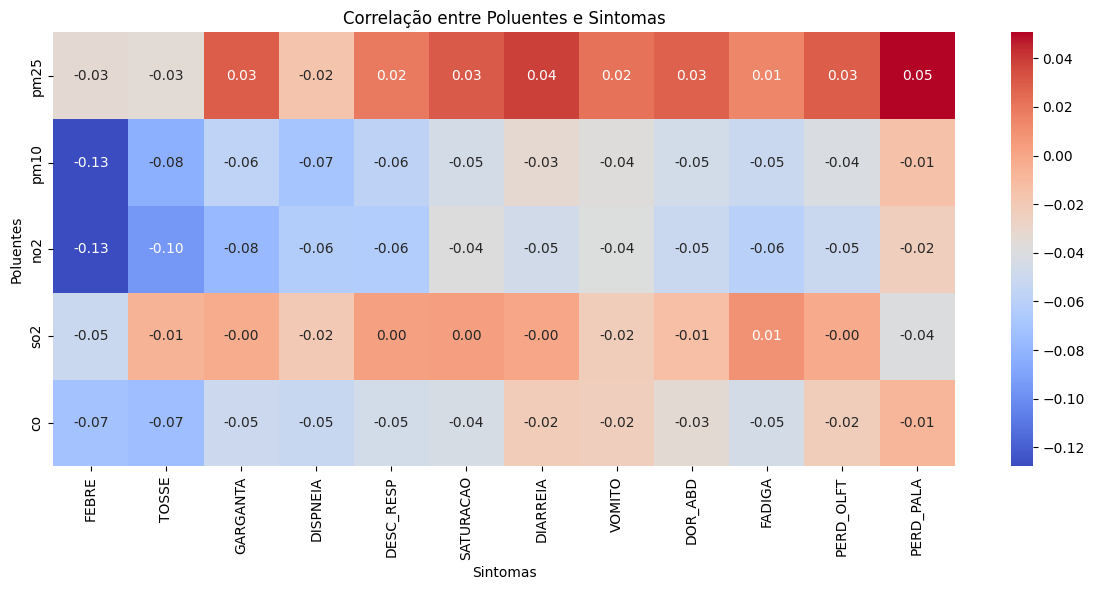

In [17]:
# Poluentes e sintomas
colunas_poluentes = ['pm25', 'pm10', 'no2', 'so2', 'co']
colunas_sintomas = ['FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 
                    'SATURACAO', 'DIARREIA', 'VOMITO', 'DOR_ABD', 
                    'FADIGA', 'PERD_OLFT', 'PERD_PALA']

# Subset do dataframe apenas com os dados relevantes
df_corr = df_normalizado[colunas_poluentes + colunas_sintomas]

# Calcula a correlação entre sintomas e poluentes
correlacoes = df_corr[colunas_sintomas].corrwith(df_corr[colunas_poluentes], axis=0)

# Matriz de correlação completa entre sintomas e poluentes
matriz_correlacao = df_corr[colunas_sintomas].corrwith(df_corr[colunas_poluentes], axis=1)

# Para uma visualização cruzada (poluentes x sintomas):
matriz_cross = df_corr[colunas_poluentes].T.corrwith(df_corr[colunas_sintomas], axis=1)
matriz = df_corr[colunas_poluentes + colunas_sintomas].corr().loc[colunas_poluentes, colunas_sintomas]

# Plotar o heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(matriz, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre Poluentes e Sintomas')
plt.ylabel('Poluentes')
plt.xlabel('Sintomas')
plt.tight_layout()
plt.show()

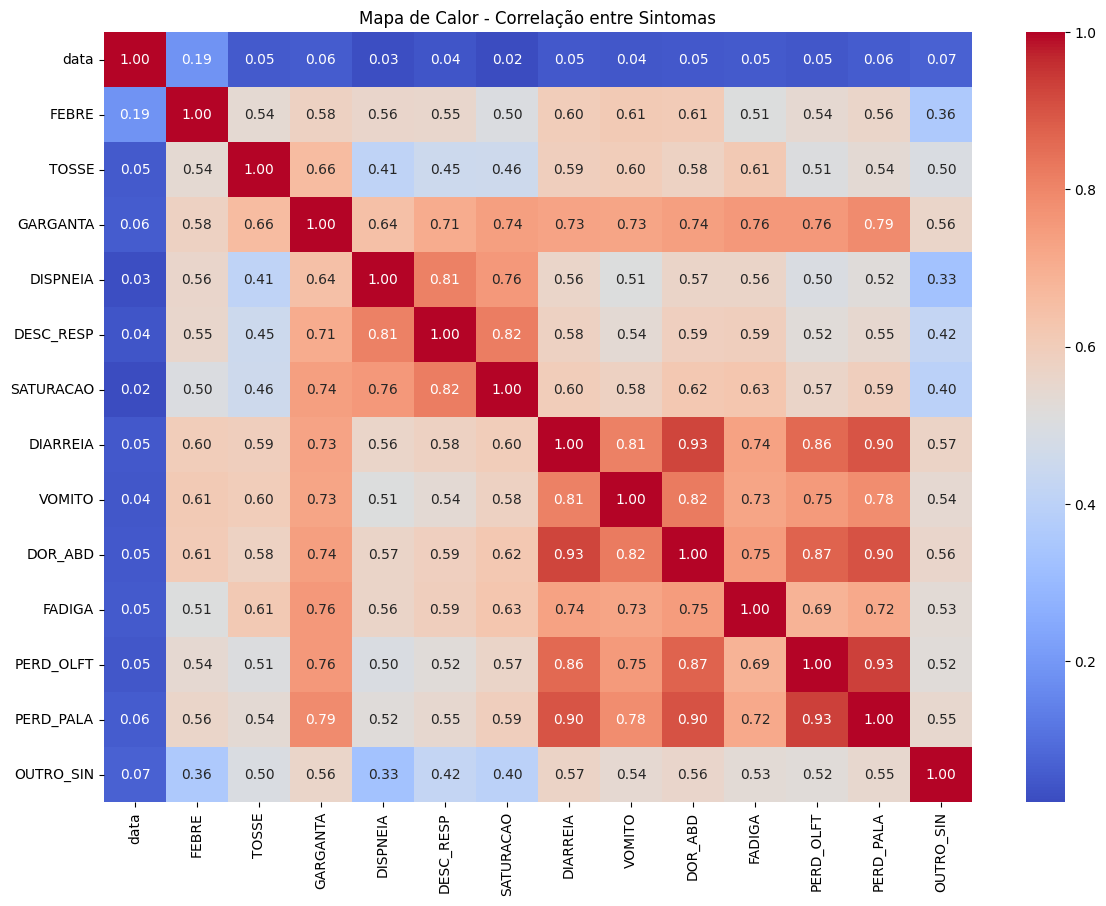

In [18]:
plt.figure(figsize=(14, 10))
sns.heatmap(df_cidade_sintomas.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor - Correlação entre Sintomas")
plt.show()

## 2. Evolução dos Sintomas ao Longo do Tempo (Semanal)

Este gráfico mostra como os casos de sintomas evoluíram ao longo do tempo, com uma agregação semanal.

Ajuda a identificar tendências, surtos ou períodos de alta notificação de sintomas.

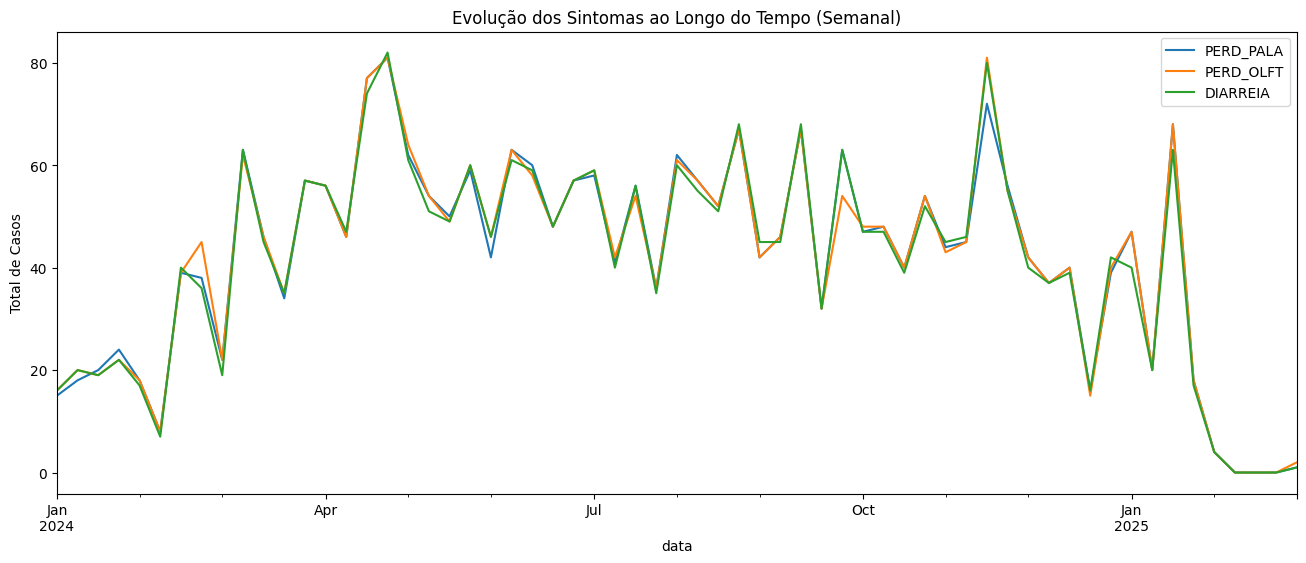

In [19]:
df_sintomas_analisados = df_cidade_sintomas[['data','PERD_PALA', 'PERD_OLFT','DIARREIA']]

# sintomas ao longo do tempo
df_sintomas_analisados.set_index('data').resample('W').sum().plot(figsize=(16, 6))
plt.title("Evolução dos Sintomas ao Longo do Tempo (Semanal)")
plt.ylabel("Total de Casos")
plt.show()

## 3. Correlação entre PM2.5 e Febre

#### Gráfico de Regressão: PM2.5 x Febre

Este gráfico analisa a relação entre os níveis de partículas finas no ar (PM2.5) e a ocorrência de febre. 
Foi utilizada uma regressão linear para verificar a tendência dos dados. 
A linha traçada ajuda a visualizar se há uma correlação positiva ou negativa — neste caso, 
indica que a febre pode aumentar com a elevação dos níveis de PM2.5, sugerindo um possível impacto da poluição na saúde da população.

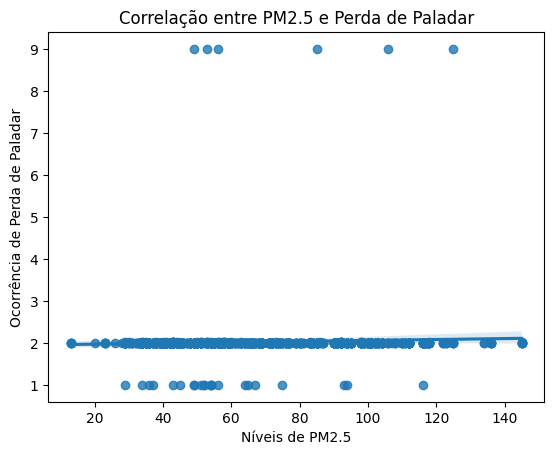

In [20]:
df_completo.columns = df_completo.columns.str.strip()
df_completo['pm25'] = pd.to_numeric(df_completo['pm25'], errors='coerce')

# relação entre PM2.5 e febre
sns.regplot(x='pm25', y='PERD_PALA', data=df_completo)
plt.xlabel("Níveis de PM2.5")
plt.ylabel("Ocorrência de Perda de Paladar")
plt.title("Correlação entre PM2.5 e Perda de Paladar")
plt.show()


## 4. Média de Casos por Sintoma

Mostra a média de ocorrência de cada sintoma ao longo do tempo.

Ajuda a entender quais sintomas são mais comuns na população analisada.

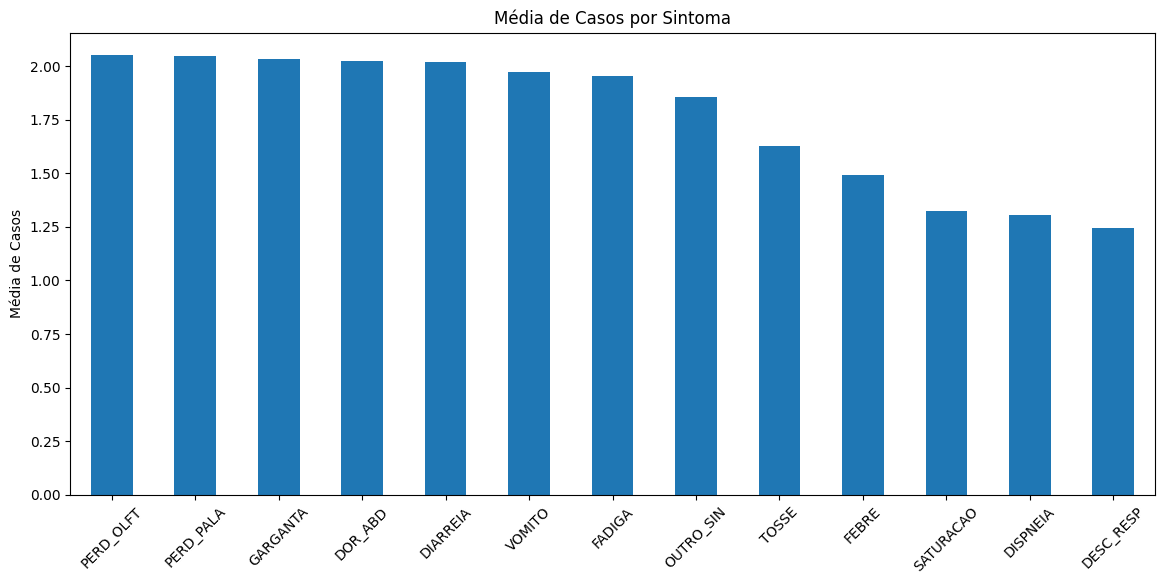

In [21]:
# Médias dos sintomas
df_cidade_sintomas.drop(columns='data').mean().sort_values(ascending=False).plot(kind='bar', figsize=(14, 6))
plt.title("Média de Casos por Sintoma")
plt.ylabel("Média de Casos")
plt.xticks(rotation=45)
plt.show()


## 5. Concentração Média dos Poluentes em Osasco

Este gráfico mostra a concentração média dos principais poluentes atmosféricos registrados em Osasco.
 
Cada barra representa a média de um tipo de poluente ao longo do período analisado. 

Esse tipo de visualização é essencial para identificar quais poluentes estão mais presentes 
na atmosfera local e quais podem ter maior impacto sobre a saúde pública.


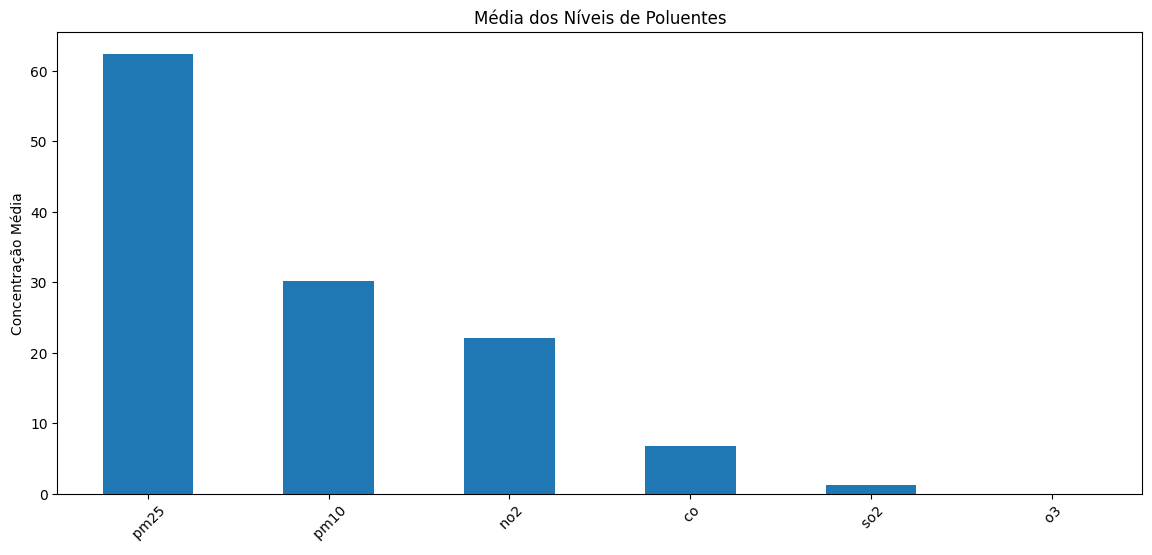

In [22]:
# Convertendo colunas para numéricas (forçando erros para NaN onde não for possível)
df_numeric = df_poluicao_cidade.drop(columns='data', errors='ignore').apply(pd.to_numeric, errors='coerce')

# Agora podemos calcular as médias corretamente
df_numeric.mean().sort_values(ascending=False).plot(kind='bar', figsize=(14, 6))
plt.title("Média dos Níveis de Poluentes")
plt.ylabel("Concentração Média")
plt.xticks(rotation=45)
plt.show()



## 6. Dispersão Temporal entre PM2.5 e Febre

Gráfico de dispersão com coloração variando ao longo do tempo.

Permite visualizar se a relação entre PM2.5 e febre muda com o passar dos dias.

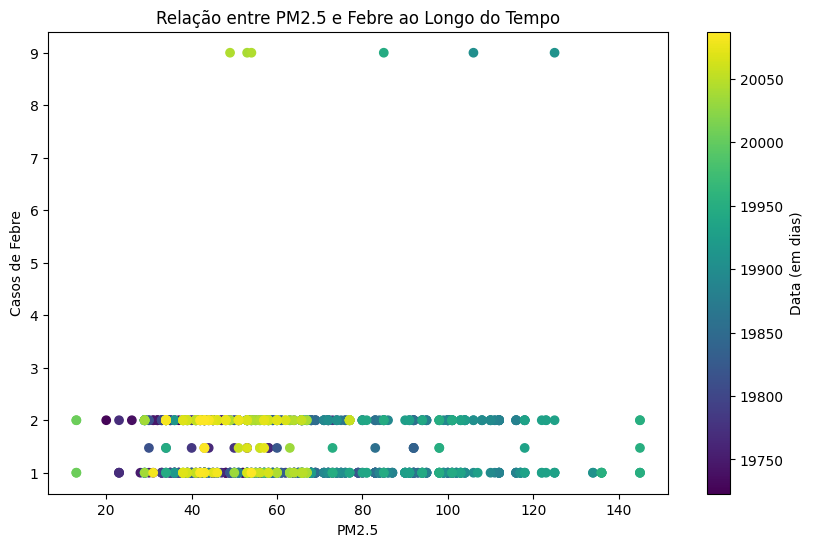

In [23]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt  # <-- reimporta após mdates

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_completo['pm25'], df_completo['FEBRE'], 
                      c=df_completo['data'].map(mdates.date2num), cmap='viridis')
plt.colorbar(scatter, label='Data (em dias)')
plt.xlabel('PM2.5')
plt.ylabel('Casos de Febre')
plt.title('Relação entre PM2.5 e Febre ao Longo do Tempo')
plt.show()